#Import necesssary packages


In [142]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from pandas.plotting import scatter_matrix
import datetime


start = datetime.datetime(2010,1,1)
end = datetime.datetime.now()

Use Yahoo FInance to get historial prices for Microsoft Stock

In [143]:
MSFT = wb.DataReader('MSFT', 'yahoo', start, end)

First five rows

In [144]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.294369
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.302216
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.153070
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.901886
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.066734


Last five rows

In [145]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-24,174.550003,163.229996,167.770004,170.889999,68311100.0,170.889999
2020-02-25,174.839996,167.649994,174.199997,168.070007,68073300.0,168.070007
2020-02-26,173.259995,168.210007,169.710007,170.169998,56206100.0,170.169998
2020-02-27,167.029999,157.979996,163.320007,158.179993,93174900.0,158.179993
2020-02-28,163.710007,152.000000,152.410004,162.009995,97012700.0,162.009995


Log Returns


In [146]:
MSFT['log_return'] = np.log(MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print (MSFT['log_return'])

Date
2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
2010-01-08    0.006873
                ...   
2020-02-24   -0.044073
2020-02-25   -0.016639
2020-02-26    0.012417
2020-02-27   -0.073064
2020-02-28    0.023924
Name: log_return, Length: 2556, dtype: float64


Plot Log Returns

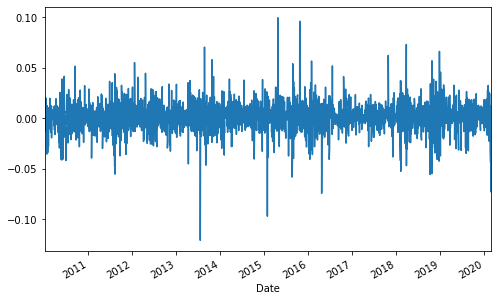

In [147]:
MSFT['log_return'].plot(figsize = (8,5))
plt.show()

Average Daily Returns`

In [148]:
 log_return_d = MSFT['log_return'].mean()
log_return_d

0.0007426275707473211

Annual Daily Returns

In [149]:
log_return_a = MSFT['log_return'].mean()*250
print(str(round(log_return_a, 5)*100) + '%')

18.566%


Compare Microsoft Returns with other tech. stocks (Apple, IBM, Google)
Get historical prices

In [150]:
tickers = ['MSFT', 'AAPL', 'IBM', 'GOOGL']
comps = pd.DataFrame()
for t in tickers:
    comps[t] = wb.DataReader(t, 'yahoo', start, end)['Adj Close']

Confirm if data is complete

In [151]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2010-01-04 to 2020-02-28
Data columns (total 4 columns):
MSFT     2556 non-null float64
AAPL     2556 non-null float64
IBM      2556 non-null float64
GOOGL    2556 non-null float64
dtypes: float64(4)
memory usage: 99.8 KB


First Five Rows

In [152]:
comps.head()

,MSFT,AAPL,IBM,GOOGL
Date,,,,
2010-01-04,24.294369,26.538483,95.994934,313.688690
2010-01-05,24.302216,26.584366,94.835304,312.307312
2010-01-06,24.153070,26.161509,94.219246,304.434448
2010-01-07,23.901886,26.113146,93.893105,297.347351
2010-01-08,24.066734,26.286753,94.835304,301.311310


Last five rows

In [153]:
comps.tail()

,MSFT,AAPL,IBM,GOOGL
Date,,,,
2020-02-24,170.889999,298.179993,146.429993,1419.859985
2020-02-25,168.070007,288.079987,141.710007,1386.319946
2020-02-26,170.169998,292.649994,139.750000,1390.469971
2020-02-27,158.179993,273.519989,133.110001,1314.949951
2020-02-28,162.009995,273.359985,130.149994,1339.250000


Normalization to 0

In [154]:
norm_data = (comps / comps.iloc[0] * 100)
norm_data

,MSFT,AAPL,IBM,GOOGL
Date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.032299,100.172893,98.791989,99.559634
2010-01-06,99.418391,98.579519,98.150227,97.049864
2010-01-07,98.384470,98.397283,97.810479,94.790587
2010-01-08,99.063016,99.051453,98.791989,96.054247
...,...,...,...,...
2020-02-24,703.414035,1123.575890,152.539292,452.633464
2020-02-25,691.806439,1085.517926,147.622380,441.941323
2020-02-26,700.450380,1102.738230,145.580599,443.264298


Plot graph to comapre stocks

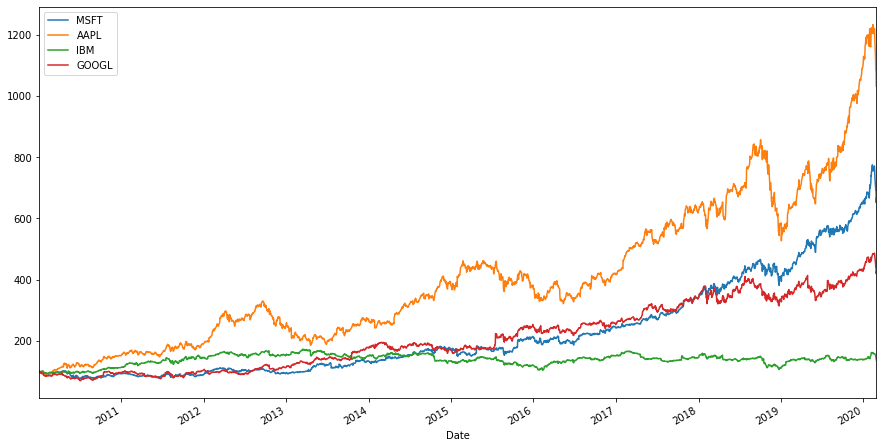

In [155]:
norm_data.plot(figsize = (15,8))

In [156]:
comps_returns = np.log(comps / comps.shift(1))
comps_returns

,MSFT,AAPL,IBM,GOOGL
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000323,0.001727,-0.012154,-0.004413
2010-01-06,-0.006156,-0.016034,-0.006517,-0.025532
2010-01-07,-0.010454,-0.001850,-0.003468,-0.023555
2010-01-08,0.006873,0.006626,0.009985,0.013243
...,...,...,...,...
2020-02-24,-0.044073,-0.048666,-0.023021,-0.043819
2020-02-25,-0.016639,-0.034459,-0.032765,-0.023906
2020-02-26,0.012417,0.015739,-0.013928,0.002989


Check correlation between stocks and plot scatter matrix

In [157]:
corr_matrix = comps_returns.corr()
corr_matrix

,MSFT,AAPL,IBM,GOOGL
MSFT,1.000000,0.468123,0.486524,0.545376
AAPL,0.468123,1.000000,0.383368,0.470839
IBM,0.486524,0.383368,1.000000,0.408668
GOOGL,0.545376,0.470839,0.408668,1.000000


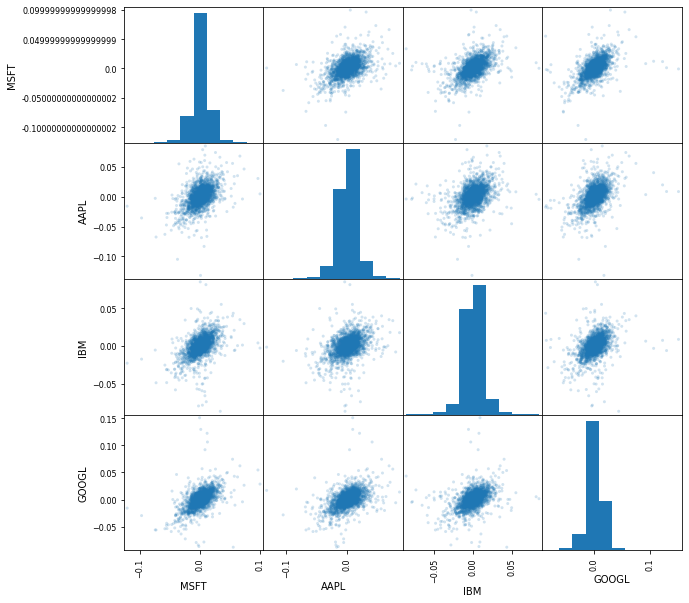

In [158]:

scatter_matrix(comps_returns, alpha=0.2, figsize=(10, 10))
plt.show()

Use Machine Learning to predict MSFT stock price

In [159]:
MSFT_data = MSFT.reset_index()
MSFT_data

,Date,High,Low,Open,Close,Volume,Adj Close,log_return
0,2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.294369,NaN
1,2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.302216,0.000323
2,2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.153070,-0.006156
3,2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.901886,-0.010454
4,2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.066734,0.006873
...,...,...,...,...,...,...,...,...
2551,2020-02-24,174.550003,163.229996,167.770004,170.889999,68311100.0,170.889999,-0.044073
2552,2020-02-25,174.839996,167.649994,174.199997,168.070007,68073300.0,168.070007,-0.016639
2553,2020-02-26,173.259995,168.210007,169.710007,170.169998,56206100.0,170.169998,0.012417
2554,2020-02-27,167.029999,157.979996,163.320007,158.179993,93174900.0,158.179993,-0.073064


Create DataFrame with date and target variable(Adj Close)

In [169]:
MSFT_new = pd.DataFrame(index=range(0, len(MSFT)), columns =['Open', 'Adj Close'])


In [170]:
for i in range(0, len(MSFT_data)):
    MSFT_new['Open'][i] = MSFT_data['Open'][i]
    MSFT_new['Adj Close'][i] = MSFT_data['Adj Close'][i]
    
MSFT_new

    

,Open,Adj Close
0,30.62,24.2944
1,30.85,24.3022
2,30.88,24.1531
3,30.63,23.9019
4,30.28,24.0667
...,...,...
2551,167.77,170.89
2552,174.2,168.07
2553,169.71,170.17
2554,163.32,158.18


Split dataset to train and validate (last two yearsi for validation, the years before to train)

In [171]:
MSFT_new.loc[2052]

Open           94.84
Adj Close    91.0094
Name: 2052, dtype: object

In [172]:
train = MSFT_new[:2052]
valid = MSFT_new[2052:]

In [173]:
train.shape

(2052, 2)

In [174]:
valid.shape

(504, 2)

In [175]:
x_train = train.drop('Adj Close', axis =1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis =1)
y_valid = valid['Adj Close']

Implement Linear Regression

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
preds = model.predict(x_valid)

In [180]:
preds

array([ 92.45431116,  91.57069737,  89.06539202,  89.85544241,
        91.93453741,  90.70787898,  91.86176941,  92.9221123 ,
        94.17996382,  94.69973757,  92.74539113,  91.09250648,
        92.28798769,  91.3108105 ,  90.59352812,  90.46877956,
        88.7431269 ,  86.90313132,  88.05702968,  92.55827226,
        87.2357862 ,  87.61002393,  87.91149366,  86.98629702,
        85.18787635,  89.95940351,  88.97182862,  88.50403542,
        89.90742296,  89.51239776,  89.94900581,  91.63307562,
        91.65386308,  92.62064257,  93.88889179,  94.11759351,
        93.5666346 ,  93.3899055 ,  93.90967925,  90.85341499,
        91.11330187,  95.32346449,  94.00324265,  90.75985159,
        92.61024488,  90.49996472,  90.87420245,  92.79736374,
        93.50425636,  93.67058777,  95.17792847,  95.53137875,
        95.65611937,  94.94922675,  95.07397531,  94.45024839,
        93.67058777,  94.69973757,  95.40663019,  94.39826785,
        96.49815824,  96.0511525 ,  95.57295367,  96.06